<a href="https://colab.research.google.com/github/marcosandrey85/EDA_gorjertas/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando base de dados

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('tips.csv')

In [6]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

In [7]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
renomear = {
     'total_bill': 'valor_da_conta', 
     'tip': 'gorjeta', 
     'dessert': 'sobremesa', 
     'day':'dia_da_semana', 
     'time':'hora_do_dia', 
     'size':'total_de_pessoas'
     
}

In [9]:
type(dados)

pandas.core.frame.DataFrame

In [10]:
gorjeta = dados.rename(columns = renomear)

In [11]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [12]:
gorjeta.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [14]:
gorjeta.sobremesa = gorjeta.sobremesa.map(sim_nao)

In [15]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [16]:
gorjeta.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dia = {
    'Sun':'Domingo', 
    'Sat': 'Sabado', 
    'Thur':'Quinta', 
    'Fri':'Sexta'

}

In [18]:
gorjeta.dia_da_semana = gorjeta.dia_da_semana.map(dia)

In [19]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [20]:
gorjeta.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora ={
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
    
}

In [22]:
gorjeta.hora_do_dia = gorjeta.hora_do_dia.map(hora)

In [23]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


## Importando o Seaborn

In [24]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 23.7 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [25]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, matplotlib, scipy, numpy
Required-by: missingno


## Análise 1 - Valor da conta e gorjeta

In [27]:
gorjeta.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

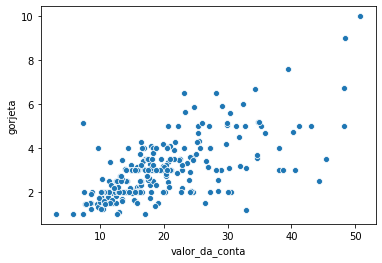

In [28]:
valor_da_gorjeta=sns.scatterplot(x='valor_da_conta', y = 'gorjeta', data = gorjeta)

**Visualmente , o valor da gorjeta aumenta conforme aumnta o valor da conta**

In [29]:
print('A base de dados contém {} registros\n'.format(gorjeta.shape[0]))
print('Registros não nulos')
gorjeta.count()

A base de dados contém 244 registros

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando o campo porcetagem

In [30]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [31]:
gorjeta['porcentagem'] = (gorjeta.gorjeta)/gorjeta.valor_da_conta

In [32]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [33]:
gorjeta.porcentagem = gorjeta.porcentagem.round(2)

In [34]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


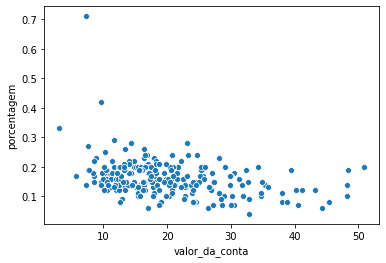

In [35]:
porcetagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data = gorjeta)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

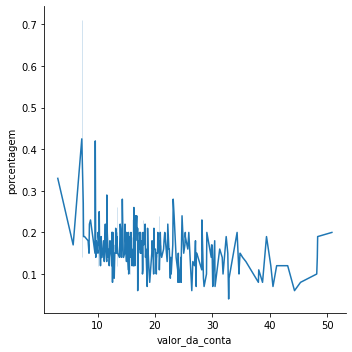

In [36]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem',kind = 'line', data = gorjeta )

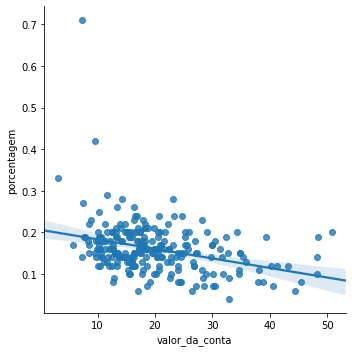

In [37]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data= gorjeta)

## Análise 2 -Sobremesa

In [38]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


In [39]:
gorjeta[gorjeta.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [40]:
gorjeta[gorjeta.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


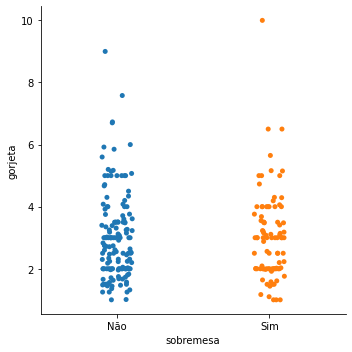

In [41]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjeta)

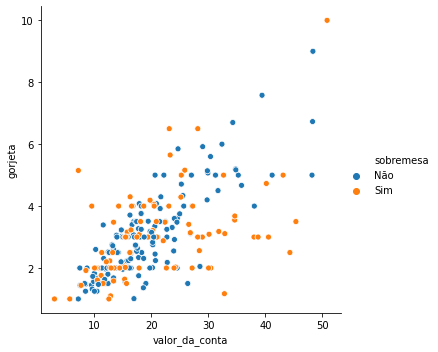

In [42]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue = 'sobremesa', data = gorjeta)

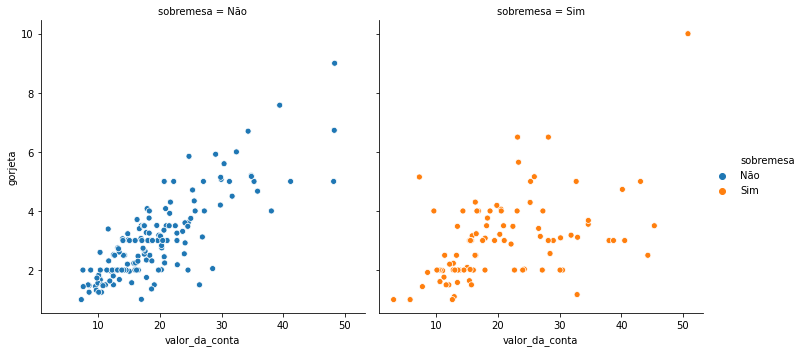

In [43]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue = 'sobremesa',col = 'sobremesa', data = gorjeta)

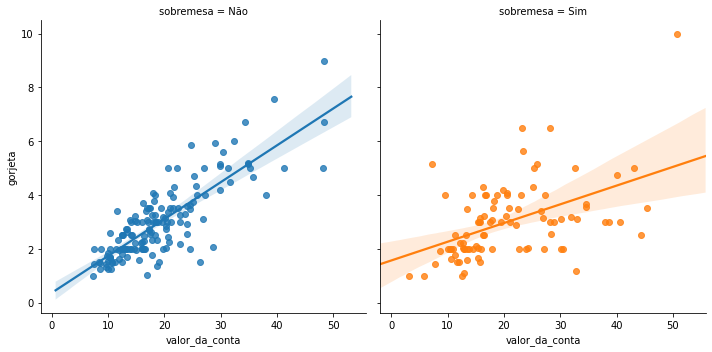

In [44]:
sns.lmplot(x='valor_da_conta', y = 'gorjeta', col='sobremesa', hue='sobremesa', data=gorjeta)

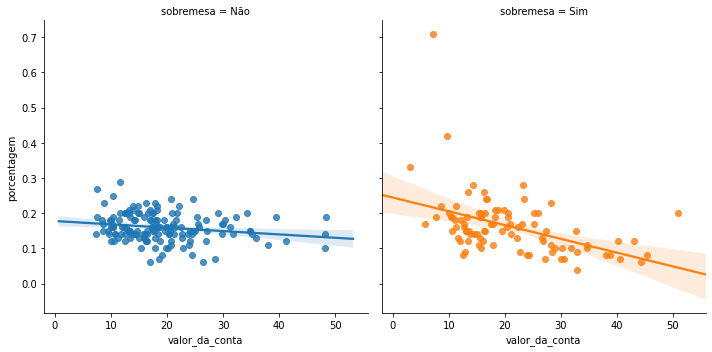

In [45]:
sns.lmplot(x='valor_da_conta', y = 'porcentagem', col='sobremesa', hue='sobremesa', data=gorjeta)

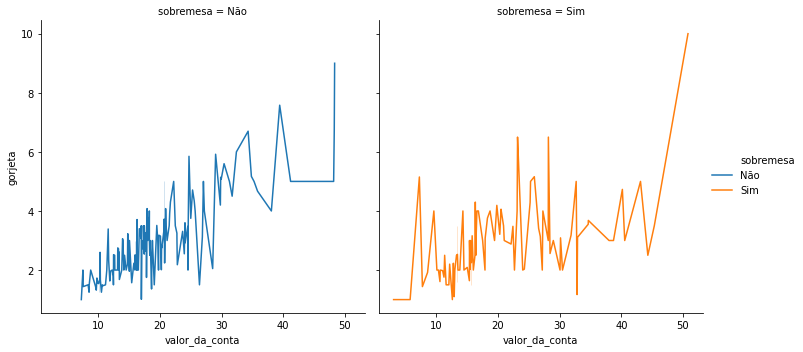

In [46]:
sns.relplot(x='valor_da_conta', y = 'gorjeta', col='sobremesa', hue='sobremesa',kind='line',data=gorjeta)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

### Teste de hipótese 

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [47]:
from scipy.stats import ranksums

In [48]:
sobremesa = gorjeta.query("sobremesa == 'Sim'").porcentagem

In [49]:
sem_sobremesa = gorjeta.query("sobremesa == 'Não'").porcentagem

In [50]:
r = ranksums(sobremesa, sem_sobremesa)

In [51]:
print('o valor do p-value é {}'.format(r.pvalue))

o valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

## Análise 3 - Dia da semana

In [52]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [53]:
gorjeta.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

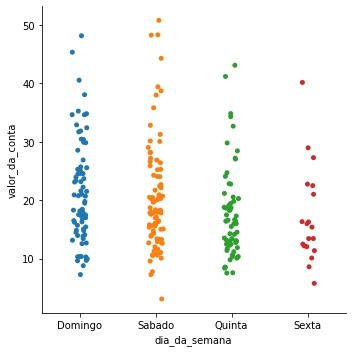

In [54]:
sns.catplot(x='dia_da_semana', y= 'valor_da_conta', data = gorjeta )

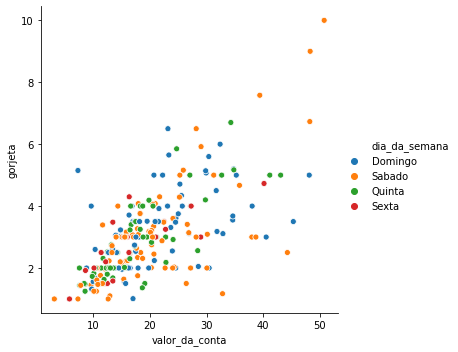

In [55]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue='dia_da_semana', data=gorjeta)

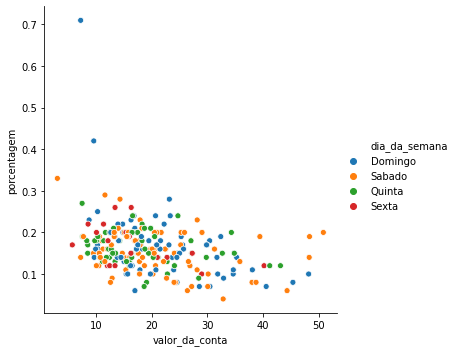

In [56]:
sns.relplot(x='valor_da_conta', y= 'porcentagem', hue='dia_da_semana', data=gorjeta)

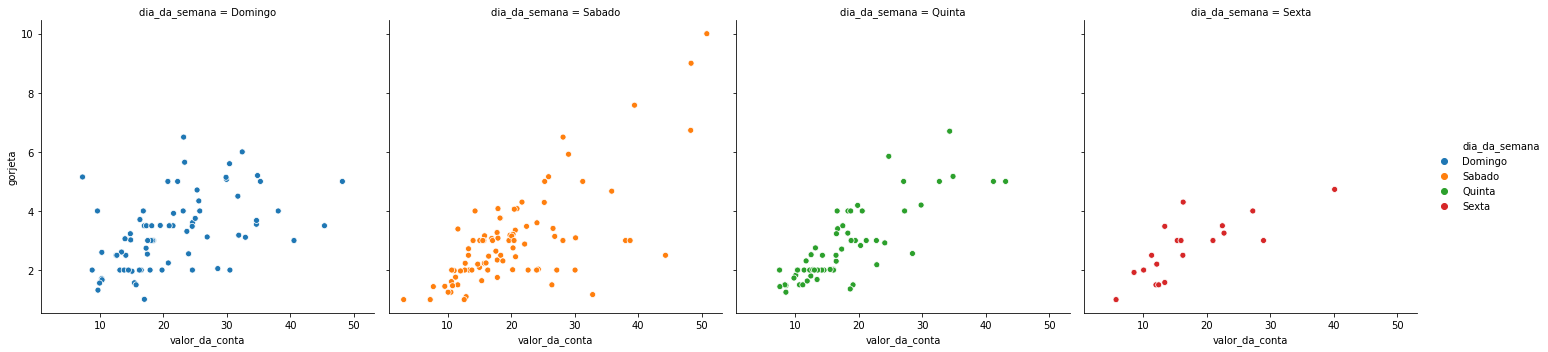

In [57]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue='dia_da_semana',col='dia_da_semana', data=gorjeta)

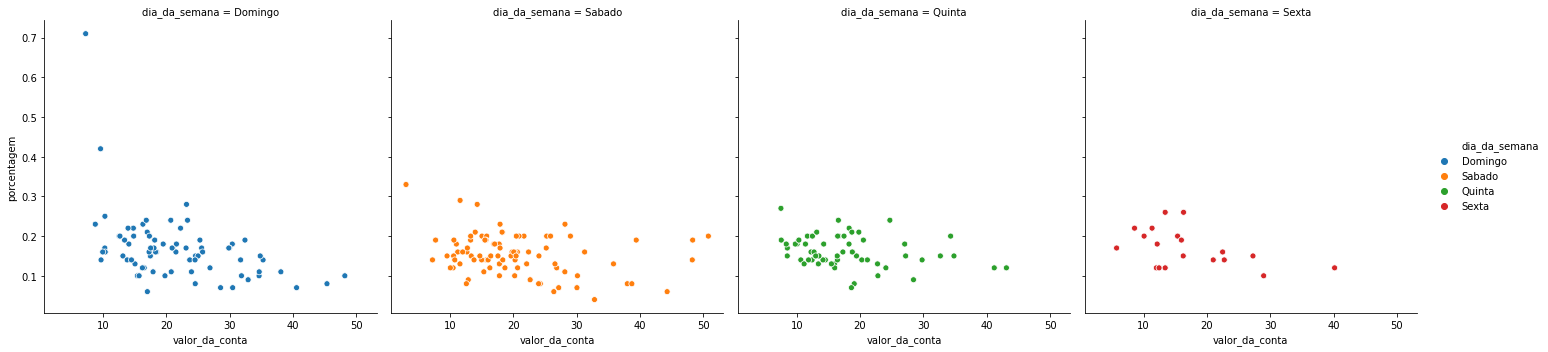

In [58]:
sns.relplot(x='valor_da_conta', y= 'porcentagem', hue='dia_da_semana',col='dia_da_semana', data=gorjeta)

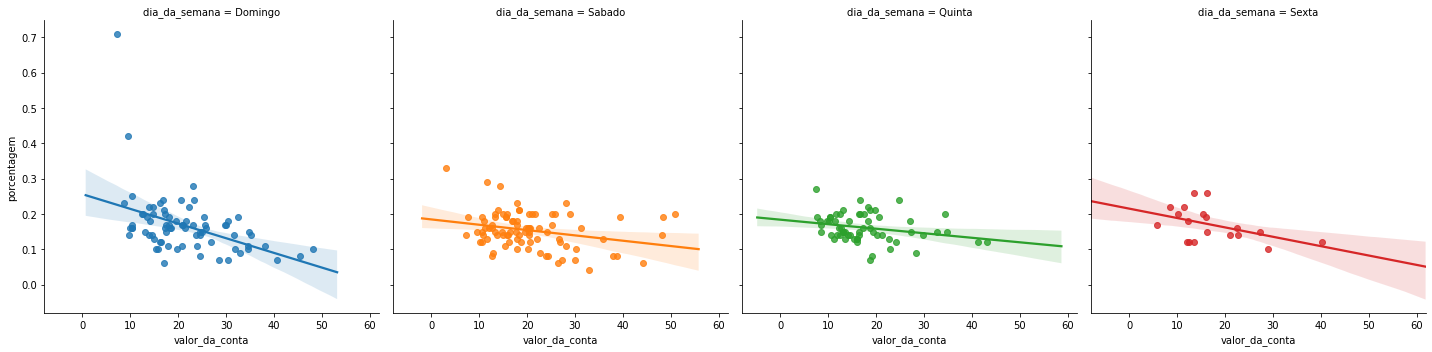

In [59]:
sns.lmplot(x='valor_da_conta', y= 'porcentagem', hue='dia_da_semana',col='dia_da_semana', data=gorjeta)

In [60]:
media_geral_gorjeta = gorjeta.gorjeta.mean()

In [61]:
print('A media geral das gorjetas é de {}'.format(media_geral_gorjeta))

A media geral das gorjetas é de 2.9982786885245902


In [62]:
gorjeta.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [63]:
print('Frequência dos dias')
gorjeta.dia_da_semana.value_counts()

Frequência dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [64]:
valor_conta_domingo = gorjeta.query("dia_da_semana == 'Domingo'").valor_da_conta

In [65]:
valor_conta_sabado=gorjeta.query("dia_da_semana == 'Sabado'").valor_da_conta

In [66]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print('O valor de p-value é {}'.format(r2.pvalue))

O valor de p-value é 0.3576728477868443


**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**


## Análise 4 - Hora do dia

In [67]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [68]:
gorjeta.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

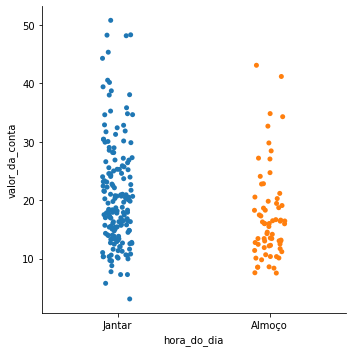

In [69]:
sns.catplot(x='hora_do_dia', y = 'valor_da_conta', data =gorjeta)

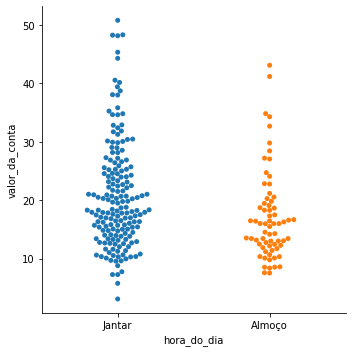

In [70]:
sns.catplot(x='hora_do_dia', y = 'valor_da_conta',kind ='swarm', data =gorjeta)

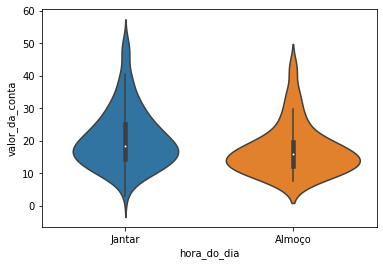

In [71]:
sns.violinplot(x='hora_do_dia',y = 'valor_da_conta', data = gorjeta )

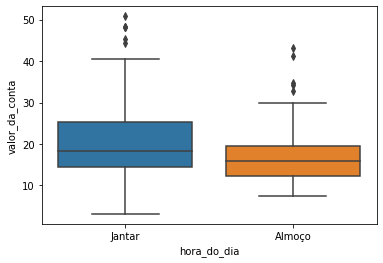

In [72]:
sns.boxplot(x= 'hora_do_dia', y= 'valor_da_conta', data = gorjeta)

In [73]:
almoco = gorjeta.query("hora_do_dia == 'Almoço'").valor_da_conta

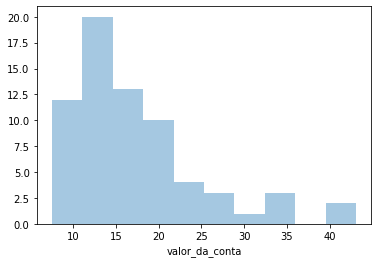

In [74]:
sns.distplot(almoco, kde =False)

In [75]:
jantar = gorjeta.query("hora_do_dia == 'Jantar'").valor_da_conta

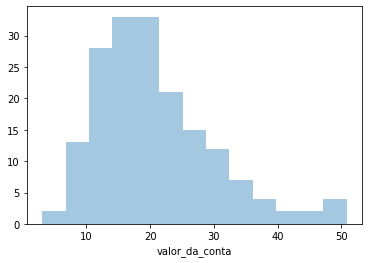

In [76]:
sns.distplot(jantar, kde =False)

In [77]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


### Teste de hipótese


**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição do valor da conta é não igual no jantar e no almoço**

In [78]:
r3  =ranksums(jantar, almoco)

In [79]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
>**A distribuição do valor da conta é não igual no jantar e no almoço**

### Teste de hipótese 2

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**


In [80]:
porcentagem_almoco = gorjeta.query("hora_do_dia == 'Almoço'").porcentagem

In [81]:
porcentagem_jantar = gorjeta.query("hora_do_dia == 'Jantar'").porcentagem

In [82]:
r4= ranksums(porcentagem_almoco,porcentagem_jantar)


In [83]:
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**
